In [34]:
import pandas as pd
import os
from ipyleaflet import *
from ipyleaflet.velocity import Velocity
from datetime import datetime

from influxdb_client import InfluxDBClient, Point, WritePrecision,WriteOptions
from influxdb_client.client.write_api import SYNCHRONOUS, PointSettings
import os
import pandas as pd


%matplotlib widget



In [35]:
token = "lVW_1FGpS31BowGBtmYtNxeWoGfugyDha2gJd1CbEbrSgpgiecr0xtbLlYFBbiMP2keyoxYCH2OhRwyX3sh0pg=="
org = "musa"
bucket = "smams"


In [36]:
file =  os.path.expanduser(f'/home/james/workspace/logs/testlog/000004.CSV')

df = pd.read_csv(file, header=0)

print(df)

        timestamp(ms)  year  month  day  hour  min  sec   iToW(ms)  \
0               15182  2022      7    2    17   11   53  580331960   
1               15208  2022      7    2    17   11   54  580332080   
2               15243  2022      7    2    17   11   54  580332120   
3               15283  2022      7    2    17   11   54  580332160   
4               15323  2022      7    2    17   11   54  580332200   
...               ...   ...    ...  ...   ...  ...  ...        ...   
103956        4168824  2022      7    2    18   21   13  584491000   
103957        4168865  2022      7    2    18   21   13  584491040   
103958        4168910  2022      7    2    18   21   13  584491080   
103959        4168946  2022      7    2    18   21   13  584491120   
103960        4168986  2022      7    2    18   21   13  584491160   

               lon        lat  ...  headMot  satcnt  fixType  fixstatus  \
0      -1219435482  373966095  ...      274      11        3          1   
1      -1

In [37]:
_timestamps = pd.to_datetime(df[['year','month','day']].astype(str).apply('-'.join,1)+" "+df[['hour','min','sec']].astype(str).apply(':'.join,1)+"."+(df['iToW(ms)']%1000).astype(str),utc=False)

In [38]:
df = df.set_index(_timestamps).drop(columns=['year','month','day','hour','min','sec','iToW(ms)','timestamp(ms)'])
#df.index.name = '_timestamps'
print(type(df.index))
df.lon = df.lon/10000000
df.lat = df.lat/10000000
#df['location'] = 'roadtrip'
#df['session'] = 'trip'

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [39]:
# with InfluxDBClient(url="192.168.1.147:8086", token=token, org=org,debug=True) as _client:
#     point_settings = PointSettings(**{"type": "vix-daily"})
#     point_settings.add_default_tag("example-name", "ingest-data-frame")
#     write_api = _client.write_api(write_options=SYNCHRONOUS, point_settings=point_settings)
#     write_api.write(bucket=bucket, record=df, data_frame_measurement_name="trackdays",write_precision=WritePrecision.MS)



In [40]:


# with InfluxDBClient(url="192.168.1.147:8086", token=token, org=org,debug=True) as _client:

#     with _client.write_api(write_options=WriteOptions(batch_size=500,
#                                                       flush_interval=10_000,
#                                                       jitter_interval=2_000,
#                                                       retry_interval=5_000,
#                                                       max_retries=5,
#                                                       max_retry_delay=30_000,
#                                                       exponential_base=2)) as _write_client:
#         _write_client.write(bucket=bucket,record=df,data_frame_measurement_name='trackdays',data_frame_tag_columns=['location'],write_precision=WritePrecision.MS)
        

In [41]:
with InfluxDBClient(url="192.168.1.147:8086", token=token, org=org,debug=False) as _client:
    with _client.write_api() as write_api:
        write_api.write(bucket=bucket, record=df,
                        data_frame_tag_columns=['location'],
                        data_frame_measurement_name="trial4")
        print("Wait to finishing ingesting DataFrame...")


Wait to finishing ingesting DataFrame...


In [42]:
df.head(10)

,lon,lat,hMSL(mm),gSpeed(mm/s),headMot,satcnt,fixType,fixstatus,accel_lon,accel_lat,accel_gvt,imu_temp,baro_pres,baro_temp
2022-07-02 17:11:53.960,-121.943548,37.396609,-6318,33,274,11,3,1,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
2022-07-02 17:11:54.800,-121.943549,37.396609,-6219,38,274,11,3,1,0.092773,0.003784,0.993042,28.867809,101655.179688,27.401802
2022-07-02 17:11:54.120,-121.943549,37.396609,-6140,58,274,11,3,1,0.087769,0.007935,0.985596,29.063648,101654.742188,27.398109
2022-07-02 17:11:54.160,-121.943549,37.396609,-6098,79,274,11,3,1,0.080444,0.012451,0.987061,29.014688,101655.171875,27.401283
2022-07-02 17:11:54.200,-121.943549,37.396609,-6030,75,274,11,3,1,0.077637,0.014771,0.988403,28.867809,101654.789062,27.401802
2022-07-02 17:11:54.240,-121.943550,37.396608,-5970,25,274,11,3,1,0.078003,0.013672,0.988525,28.867809,101654.664062,27.403862
2022-07-02 17:11:54.280,-121.943550,37.396608,-5898,34,274,11,3,1,0.078735,0.008667,0.989014,29.063648,101654.921875,27.408585
2022-07-02 17:11:54.320,-121.943550,37.396608,-5808,63,274,11,3,1,0.083252,0.002808,0.988159,29.014688,101654.734375,27.406960
2022-07-02 17:11:54.360,-121.943550,37.396608,-5720,62,274,11,3,1,0.088257,-0.000488,0.989380,28.867809,101655.195312,27.418541
2022-07-02 17:11:54.400,-121.943551,37.396608,-5615,23,274,11,3,1,0.089966,-0.002197,0.988892,28.818850,101655.390625,27.418541


<AxesSubplot:>

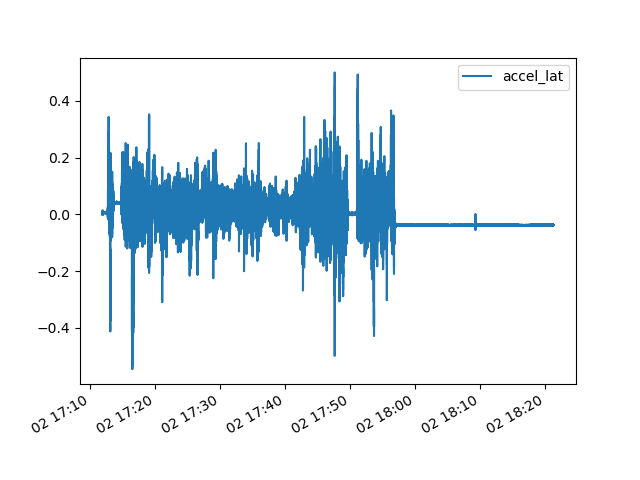

In [43]:
df.plot(y='accel_lat')

In [44]:

coords = df[['lat', 'lon']].values.tolist()

center = ((df.lat.max()+df.lat.min())/2, (df.lon.max()+df.lon.min())/2)

#m = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=17)
m = Map(basemap=basemaps.Esri.WorldImagery,center=center, zoom=12)
m.layout.height = '2000px'

#marker = Marker(location=center, draggable=True)
# m.add_layer(marker)

testline = Polyline(locations=coords,
                    color='#0000fF', fill=False, weight=2, opacity=0.8)

m.add_layer(testline)

display(m)

Map(center=[37.2089308, -121.7732394], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…